In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#curious about this because jobs and saries are importatn for companies and people to contribute and optimize output

***Goals: 
Use dataset 1 for a simple prediction model for the base pay and bonuses
Use dataset 2 with nlp for a more in depth analysis (because the first dataset only has 10 types of jobs) (other file)
1. Data Preprocessing and EDA
2. Some visualizations to understand what could be best ML model
3. Model Testing (find what performs best and why) (nlp vs straight up)
4. Create Web UI possibly???

In [40]:
df = pd.read_csv('Salary Data.csv')
df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [117]:
#only several different job titles, but something that I notice 
df['JobTitle'].unique()

array(['Graphic Designer', 'Software Engineer', 'Warehouse Associate',
       'IT', 'Sales Associate', 'Driver', 'Financial Analyst',
       'Marketing Associate', 'Data Scientist', 'Manager'], dtype=object)

In [51]:
#Note: not that much frequency of exact names, also words that overlap could be helpful (director, senior, manager)
df.groupby('JobTitle')['JobTitle'].count().sort_values(ascending=False)

JobTitle
Marketing Associate    118
Software Engineer      109
Data Scientist         107
Financial Analyst      107
Graphic Designer        98
IT                      96
Sales Associate         94
Driver                  91
Manager                 90
Warehouse Associate     90
Name: JobTitle, dtype: int64

In [104]:
#using the different names for visualizations
jobs = df['JobTitle'].sort_values().unique()
edu = df['Education'].sort_values().unique()
jobs

array(['Data Scientist', 'Driver', 'Financial Analyst',
       'Graphic Designer', 'IT', 'Manager', 'Marketing Associate',
       'Sales Associate', 'Software Engineer', 'Warehouse Associate'],
      dtype=object)

In [86]:
#noticing the pay differences depending on job
df.groupby('JobTitle')['BasePay'].mean()

JobTitle
Data Scientist          92433.420561
Driver                  89382.208791
Financial Analyst       94996.878505
Graphic Designer        90892.530612
IT                      90737.468750
Manager                125329.600000
Marketing Associate     76656.372881
Sales Associate         93396.489362
Software Engineer      105514.935780
Warehouse Associate     89556.122222
Name: BasePay, dtype: float64

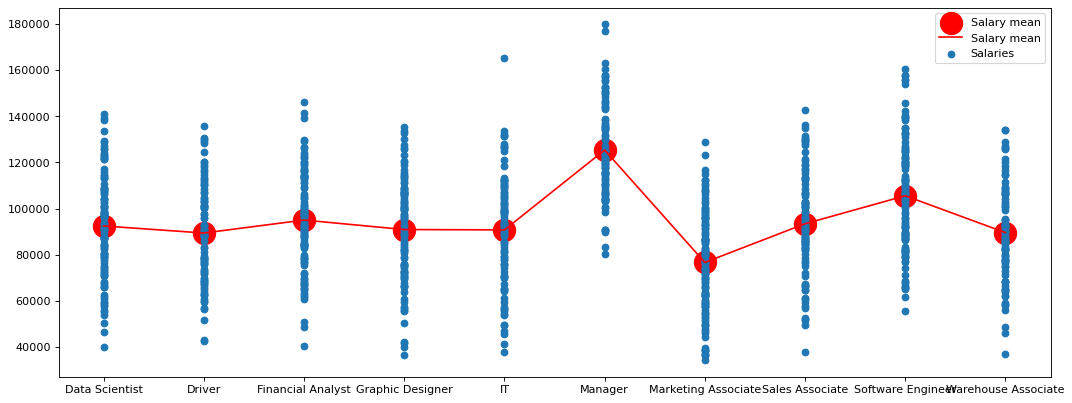

In [110]:
#noticing manager is higher than the rest, all seem to be around the same area
plt.figure(figsize=(16, 6), dpi=80)
plt.scatter(jobs, df.groupby('JobTitle')['BasePay'].mean(), color='red', s=400, label='Salary mean')
plt.plot(df.groupby('JobTitle')['BasePay'].mean(), color='red', label='Salary mean')
plt.scatter(df['JobTitle'], df['BasePay'], label='Salaries')
plt.legend()
plt.show()

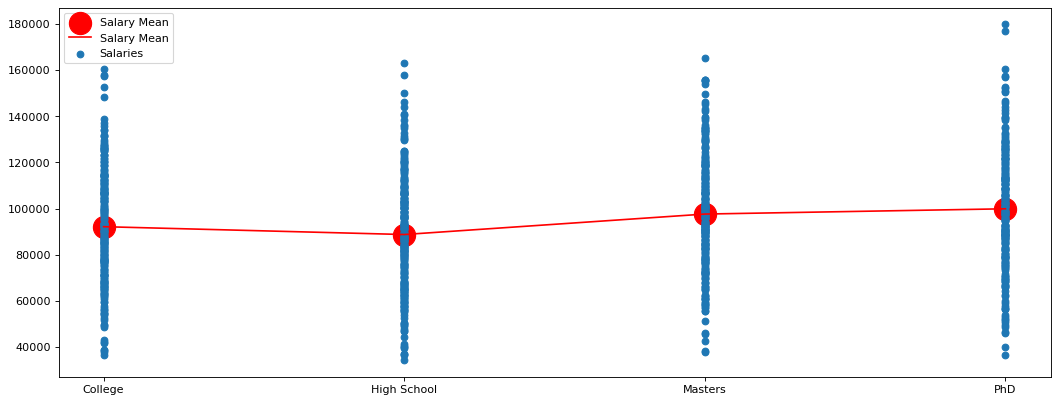

In [113]:
#noticing education does not play as much as a role as I presumed
plt.figure(figsize=(16, 6), dpi=80)
plt.scatter(edu, df.groupby('Education')['BasePay'].mean(), color='red', s=400, label='Salary Mean')
plt.plot(edu, df.groupby('Education')['BasePay'].mean(), color='red', label = 'Salary Mean')
plt.scatter(df['Education'], df['BasePay'], label='Salaries')
plt.legend()
plt.show()

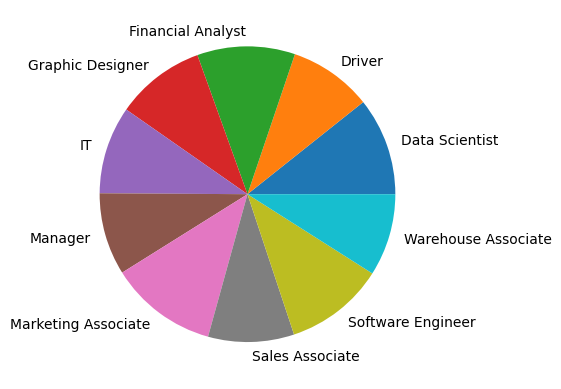

In [99]:
#not that much of a difference so good to use a model on
plt.pie(df.groupby('JobTitle')['JobTitle'].count(), labels=jobs)
plt.show()

In [ ]:
'''
start of malipulation for ml
1. use one hot encoding (nominal) for JobTitle	Gender	Dept
2. order these numerically (ordinal)	Education
3. since we need a single dependent variable, add basepay and extra together

LinearRegression(fit_intercept=True)   
Lasso()
DecisionTreeRegressor(random_state=0,criterion="squared_error")
RandomForestRegressor(random_state=0,criterion="absolute_error")
KNeighborsRegressor(n_neighbors=num_of_features,weights="distance")
'''


In [115]:
#converting categorical variables with dummies (OneHotEncoding)
job_dummies = pd.get_dummies(df['JobTitle'])
gen_dummies = pd.get_dummies(df['Gender'])
dept_dummies = pd.get_dummies(df['Dept'])
dept_dummies

,Administration,Engineering,Management,Operations,Sales
0,False,False,False,True,False
1,False,False,True,False,False
2,True,False,False,False,False
3,False,False,False,False,True
4,False,True,False,False,False
...,...,...,...,...,...
995,True,False,False,False,False
996,False,False,False,False,True
997,False,False,False,True,False
998,True,False,False,False,False


In [124]:
#using this because there are levels (ordinal)
def change_edu(name):
    if name == 'High School':
        return 0
    if name == 'College':
        return 1
    if name == 'Masters':
        return 2
    if name == 'PhD':
        return 3

In [130]:
#seeing if change was applied correctly
df['Education'].apply(change_edu)

0      1
1      1
2      3
3      2
4      2
      ..
995    0
996    2
997    0
998    0
999    3
Name: Education, Length: 1000, dtype: int64

In [136]:
#creating the df to be used for hte model
model_df = pd.concat([df[['Age', 'PerfEval', 'Seniority']], job_dummies, gen_dummies, dept_dummies], axis=1)

In [141]:
#adding extra rows
model_df['Education'] = df['Education'].apply(change_edu)
model_df['Annual Pay'] = df['BasePay'] + df['Bonus']
model_df

,Age,PerfEval,Seniority,Data Scientist,Driver,Financial Analyst,Graphic Designer,IT,Manager,Marketing Associate,...,Warehouse Associate,Female,Male,Administration,Engineering,Management,Operations,Sales,Education,Annual Pay
0,18,5,2,False,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,1,52301
1,21,5,5,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,1,119604
2,19,4,5,False,False,False,False,False,False,False,...,True,True,False,True,False,False,False,False,3,99476
3,20,5,4,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,2,118234
4,26,5,5,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,2,108783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,61,1,1,False,False,False,False,False,False,True,...,False,True,False,True,False,False,False,False,0,65914
996,57,1,2,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,2,112544
997,48,1,1,False,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,0,95071
998,65,2,1,False,False,True,False,False,False,False,...,False,False,True,True,False,False,False,False,0,99601


In [146]:
#inputs and outputs
X = model_df.drop('Annual Pay', axis=1)
y = model_df['Annual Pay']

0       52301
1      119604
2       99476
3      118234
4      108783
        ...  
995     65914
996    112544
997     95071
998     99601
999    125352
Name: Annual Pay, Length: 1000, dtype: int64

In [307]:
#train test split at 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [308]:
#Regression Model Start
reg = LinearRegression(fit_intercept = True)
#reg = Lasso()
#reg = DecisionTreeRegressor(random_state=0,criterion="squared_error")
#reg = RandomForestRegressor(random_state=0,criterion="absolute_error")
#reg = KNeighborsRegressor(n_neighbors=len(5),weights="distance")

In [309]:
reg.fit(X_train, y_train)

LinearRegression()

In [310]:
#regression works very well
reg.score(X_test, y_test)

0.8565887033325783

In [311]:
#using this so just by typing inputs regression can be calculated
def predict_salary(JobTitle, Gender, Age, Education, Dept, PerfEval=3, Seniority=3):
    inputs = np.zeros(len(X.columns))
    inputs[0] = Age
    inputs[1] = PerfEval
    inputs[2] = Seniority
    inputs[list(X.columns).index(Gender)] = True
    inputs[list(X.columns).index(JobTitle)]= True
    inputs[list(X.columns).index(Dept)] = True    
    inputs[-1] = change_edu(Education)
    #print(inputs)
    return reg.predict([inputs])[0]

In [312]:
#function works well
predict_salary("Graphic Designer", "Female", 18, "College", "Operations", 5, 2)
predict_salary("Software Engineer","Male",21, "College","Management", 5, 5)

C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


115348.87451062005

In [314]:
#second way to  test val score (but with no predictions)
cv = ShuffleSplit(n_splits=5, test_size=0.2)
cross_val_score(
    LinearRegression(),
    X,
    y,
    cv=cv,
)

array([0.84219601, 0.82497977, 0.83971104, 0.84376421, 0.83436543])

In [315]:
#adding predictions to dataset to see final results
with_predictions = pd.concat([X_test, y_test], axis=1)
with_predictions['predictions'] = reg.predict(X_test)
with_predictions

,Age,PerfEval,Seniority,Data Scientist,Driver,Financial Analyst,Graphic Designer,IT,Manager,Marketing Associate,...,Female,Male,Administration,Engineering,Management,Operations,Sales,Education,Annual Pay,predictions
458,33,3,1,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,1,84236,67453.511505
58,49,5,3,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,1,79524,105293.711699
130,53,5,5,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,3,136138,134850.584840
964,58,2,1,False,False,False,False,False,False,True,...,True,False,False,False,False,True,False,0,64198,70326.927065
478,62,5,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,True,2,92258,104043.514500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,36,1,1,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,3,82838,90825.856461
109,29,4,5,False,False,False,False,False,False,True,...,True,False,True,False,False,False,False,2,98640,90436.829610
66,53,5,5,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,1,136772,130291.986755
744,45,2,2,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,2,105090,91461.053665


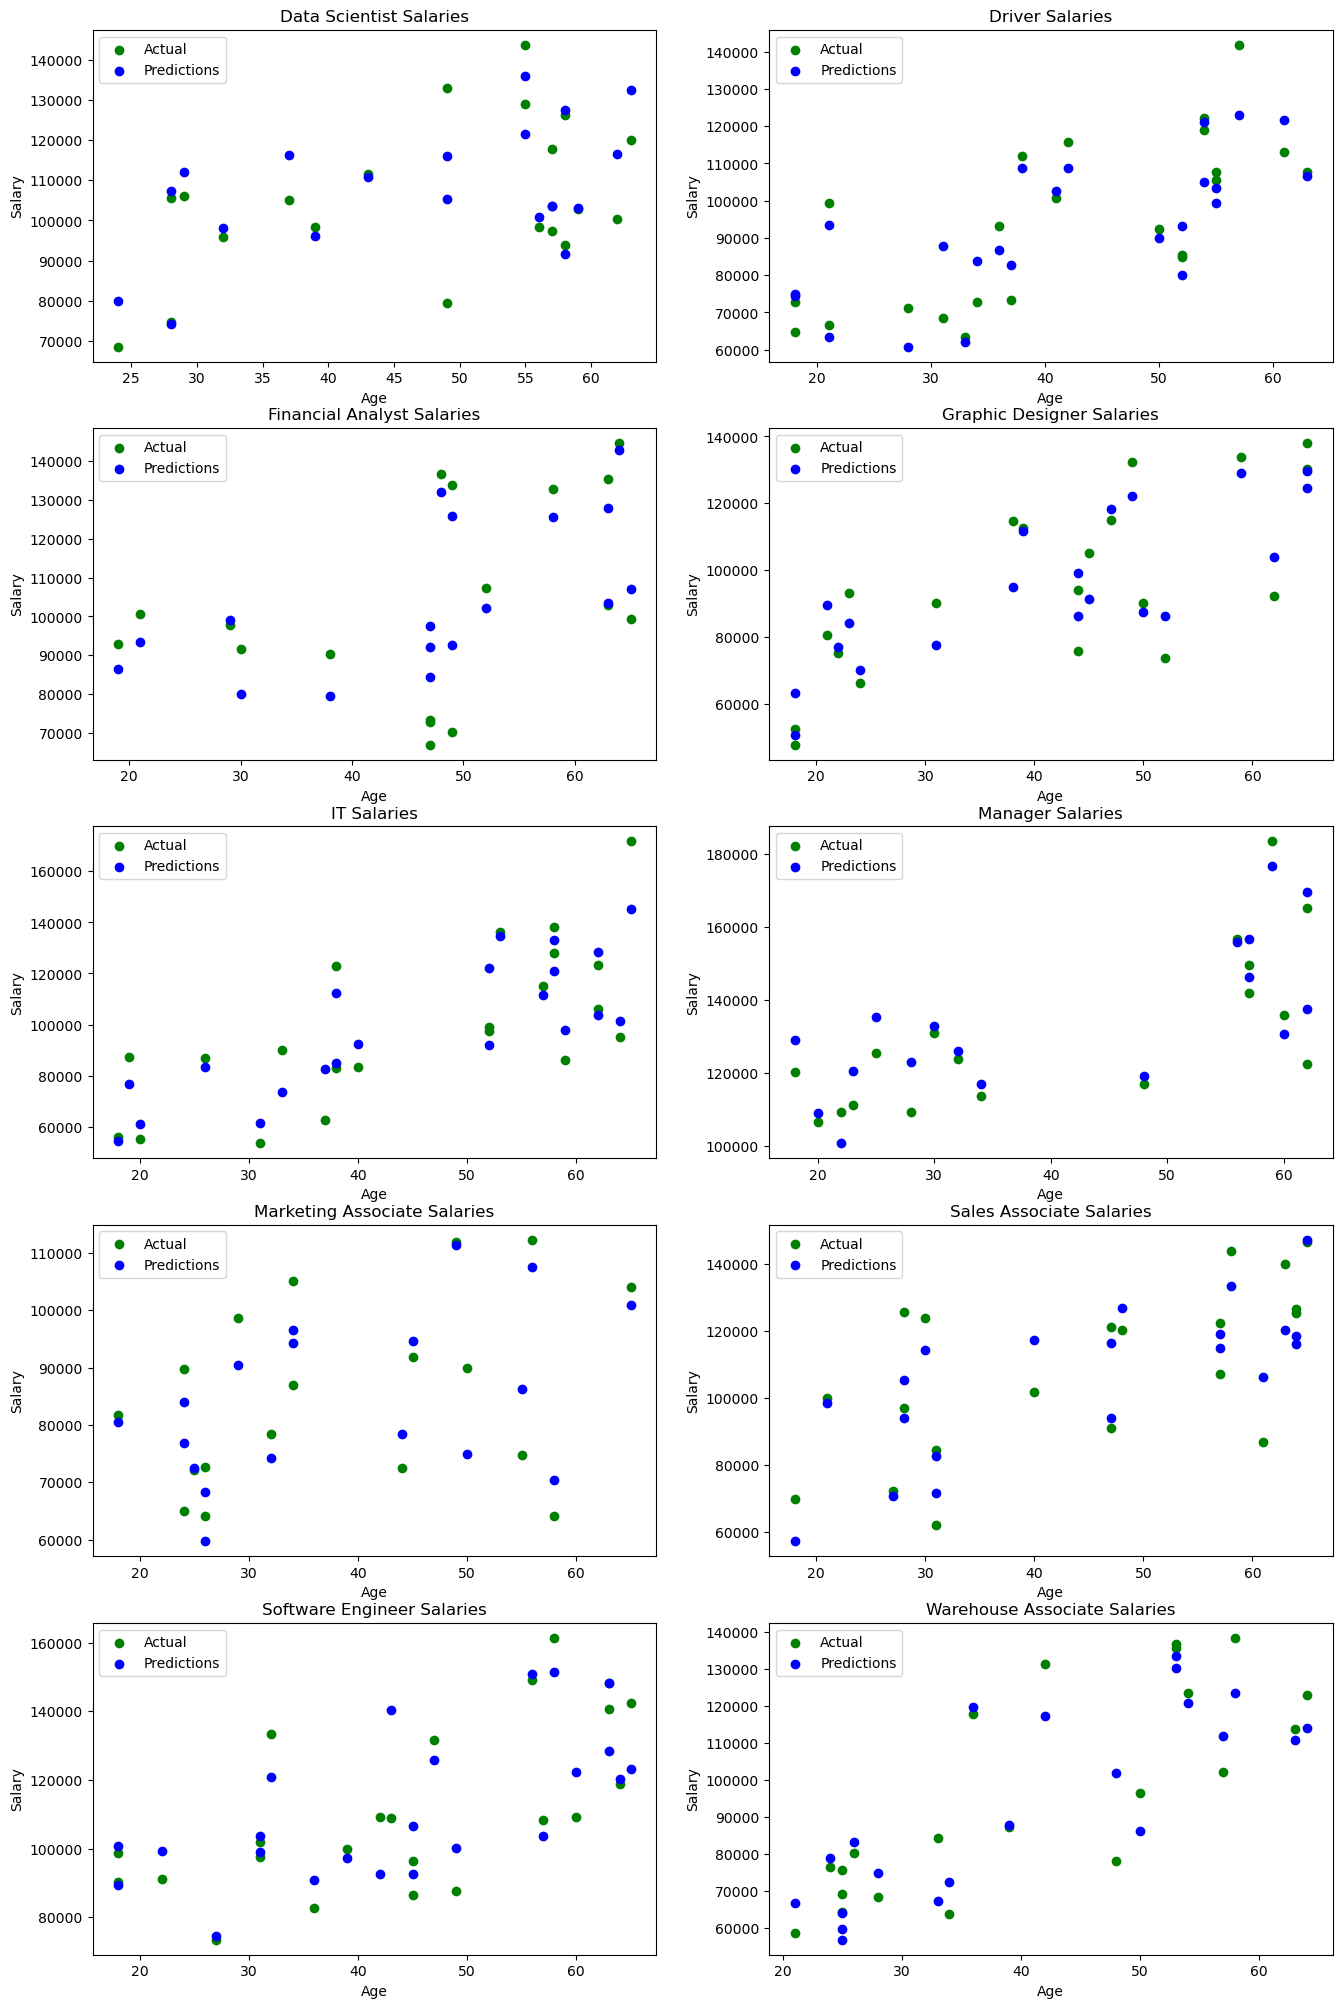

In [316]:
#Analyzing how well our prediction was with graphs
fig, axs = plt.subplots(5, 2, figsize=(16, 25))
axs = axs.ravel()

for i, job in enumerate(jobs):    
    ds = with_predictions[with_predictions[job] ==True]
    axs[i].scatter(ds['Age'], ds['Annual Pay'], color='green', label="Actual")
    axs[i].scatter(ds['Age'], ds['predictions'], color='blue', label='Predictions')
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel('Salary')
    axs[i].legend()
    axs[i].title.set_text(job + " Salaries")

#Notice the Predictions and Actuals flow the same direction, picturing the rise in salary coming with age